
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 
70 elements each, randomly selected for

the experiment. 
High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.




In [72]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName('cluster').getOrCreate() 
print('Spark Version: {}'.format(spark.version))


Spark Version: 3.5.0


In [73]:
#Loading the data 

dataset = spark.read.csv("Spark/Spark/Data/seeds_dataset.csv",header=True,inferSchema=True) 

#show the data in the above file using the below command 

dataset.show(5)


+-----+---------+-----------+------------------+------------------+---------------------+----------------+
| area|perimeter|compactness|  length_of_kernel|   width_of_kernel|asymmetry_coefficient|length_of_groove|
+-----+---------+-----------+------------------+------------------+---------------------+----------------+
|15.26|    14.84|      0.871|             5.763|             3.312|                2.221|            5.22|
|14.88|    14.57|     0.8811| 5.553999999999999|             3.333|                1.018|           4.956|
|14.29|    14.09|      0.905|             5.291|3.3369999999999997|                2.699|           4.825|
|13.84|    13.94|     0.8955|             5.324|3.3789999999999996|                2.259|           4.805|
|16.14|    14.99|     0.9034|5.6579999999999995|             3.562|                1.355|           5.175|
+-----+---------+-----------+------------------+------------------+---------------------+----------------+
only showing top 5 rows



In [74]:
#Print schema 
dataset.printSchema()


root
 |-- area: double (nullable = true)
 |-- perimeter: double (nullable = true)
 |-- compactness: double (nullable = true)
 |-- length_of_kernel: double (nullable = true)
 |-- width_of_kernel: double (nullable = true)
 |-- asymmetry_coefficient: double (nullable = true)
 |-- length_of_groove: double (nullable = true)



In [75]:
from pyspark.ml.feature import VectorAssembler 

vec_assembler = VectorAssembler(inputCols = dataset.columns, 
								outputCol='features') 

final_data = vec_assembler.transform(dataset) 
final_data.select('features').show(5)


+--------------------+
|            features|
+--------------------+
|[15.26,14.84,0.87...|
|[14.88,14.57,0.88...|
|[14.29,14.09,0.90...|
|[13.84,13.94,0.89...|
|[16.14,14.99,0.90...|
+--------------------+
only showing top 5 rows



In [76]:
from pyspark.ml.feature import StandardScaler 

scaler = StandardScaler(inputCol="features", 
						outputCol="scaledFeatures", 
						withStd=True, 
						withMean=False) 

# Compute summary statistics by fitting the StandardScaler 
scalerModel = scaler.fit(final_data) 

# Normalize each feature to have unit standard deviation. 
final_data = scalerModel.transform(final_data) 

final_data.select('scaledFeatures').show(5)


+--------------------+
|      scaledFeatures|
+--------------------+
|[5.24452795332028...|
|[5.11393027165175...|
|[4.91116018695588...|
|[4.75650503761158...|
|[5.54696468981581...|
+--------------------+
only showing top 5 rows



In [77]:
#Importing the model 
from pyspark.ml.clustering import KMeans 
from pyspark.ml.evaluation import ClusteringEvaluator 

silhouette_score=[] 

evaluator = ClusteringEvaluator(predictionCol='prediction', 
								featuresCol='scaledFeatures',
								metricName='silhouette', 
								distanceMeasure='squaredEuclidean') 

for i in range(2,10): 
	kmeans=KMeans(featuresCol='scaledFeatures', k=i) 
	model=kmeans.fit(final_data) 
	predictions=model.transform(final_data) 
	score=evaluator.evaluate(predictions) 
	silhouette_score.append(score) 
	print('Silhouette Score for k =',i,'is',score)


Silhouette Score for k = 2 is 0.6613125393827092
Silhouette Score for k = 3 is 0.5937831799608204
Silhouette Score for k = 4 is 0.4898001960447284
Silhouette Score for k = 5 is 0.42485671107555983
Silhouette Score for k = 6 is 0.4441396199232223
Silhouette Score for k = 7 is 0.440754397550797
Silhouette Score for k = 8 is 0.40784522986275235
Silhouette Score for k = 9 is 0.4025364018462468


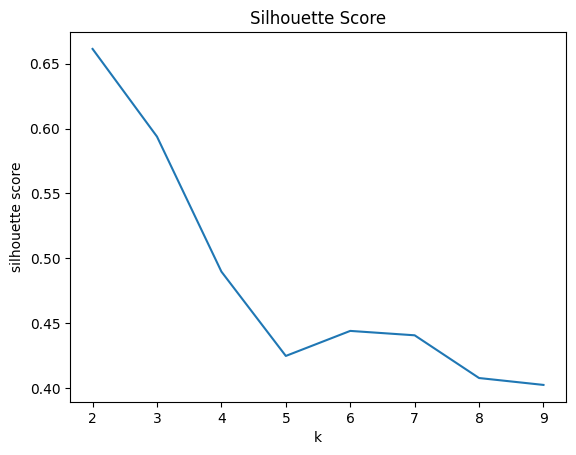

In [78]:
#Visualizing the silhouette scores in a plot 
import matplotlib.pyplot as plt 

plt.plot(range(2,10),silhouette_score) 
plt.xlabel('k') 
plt.ylabel('silhouette score') 
plt.title('Silhouette Score') 
plt.show()


In [61]:
# Trains a k-means model. 
kmeans = KMeans(featuresCol='scaledFeatures',k=3) 
model = kmeans.fit(final_data) 
predictions = model.transform(final_data)


In [62]:
# Printing cluster centers 
centers = model.clusterCenters() 
print("Cluster Centers: ") 
for center in centers: 
	print(center)


Cluster Centers: 
[ 4.93382436 10.94691274 37.30542404 12.41332714  8.60366812  1.82917353
 10.40106154]
[ 6.35645488 12.40730852 37.41990178 13.93860446  9.7892399   2.41585013
 12.29286107]
[ 4.06660859 10.14191893 35.84098009 11.81592066  7.52397236  3.1823335
 10.39801233]
